In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
import numpy as np
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
df = pd.read_csv('./Data/duration_survey_df.csv',encoding='utf-16')
df['Success'] = df['Success'].apply(lambda x : 'Success' if x == 1 else 'Fail')

In [3]:
df['duration'].describe()

count    1315.000000
mean      143.286371
std        99.206681
min         0.040000
25%        78.218229
50%       122.208333
75%       181.590533
max       959.959000
Name: duration, dtype: float64

In [4]:
df.groupby(['Success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
Fail,634.0,142.13095,104.624622,4.495504,70.846242,122.154167,181.096345,959.959000
Success,681.0,144.36205,93.946897,0.040000,81.041667,122.255467,181.933333,878.666667


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

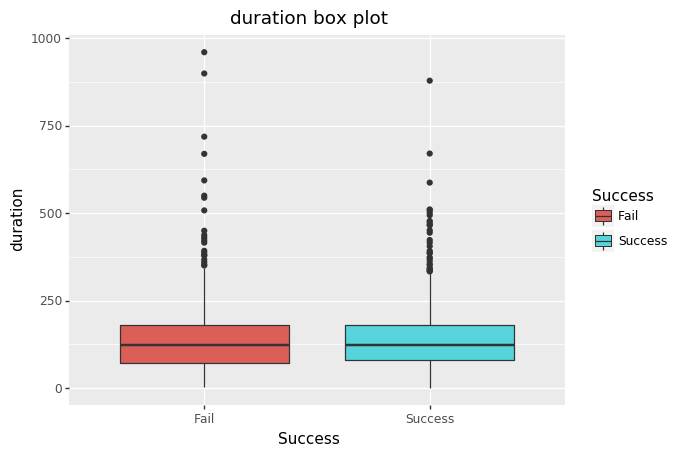

<ggplot: (7528648291)>

In [5]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(df, aes(x='Success', y='duration')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('duration box plot')
video_duration.save('Video duration by success.pdf')
video_duration

In [6]:
df.groupby(['Success','super_category'])['duration'].describe()

count        mean         std        min  \
Success super_category                                                    
Fail    Arts                    42.0  163.845954  141.932087  11.833968   
        Comics & Illustartion   34.0  114.802874   69.066924  29.333333   
        Design & Tech          140.0  119.657368   86.209559   4.495504   
        Film                   100.0  179.938593  135.784286   5.960000   
        Food & Craft            95.0  132.264154   76.479608  13.000000   
        Games                  107.0  127.582217   80.034035  19.419400   
        Music                   35.0  136.863355  121.714474  23.516667   
        Publishing              81.0  167.576474  112.397591  15.648967   
Success Arts                    59.0  151.912586  104.155974   0.040000   
        Comics & Illustartion   89.0  129.633316   72.499356   3.918257   
        Design & Tech          136.0  127.942523   78.660327   0.040000   
        Film                    68.0  161.688104   85.228289  20.000000   
        Food & Craft            29.0  122.594658   56.471678  30.764067   
        Games                  150.0  133.417192  103.581172  25.720000   
        Music                   70.0  197.369410  118.905448   7.166667   
        Publishing              80.0  150.396142   88.118149  23.223200   

                                      25%         50%         75%         max  
Success super_category                                                         
Fail    Arts                    95.064527  128.264633  184.690756  899.160000  
        Comics & Illustartion   66.833283   87.020267  154.500333  279.012067  
        Design & Tech           53.071342   92.968708  170.220000  422.366667  
        Film                   100.677083  160.105400  234.880479  959.959000  
        Food & Craft            87.873850  124.266667  171.191854  334.200000  
        Games                   73.373317  108.174733  162.283333  593.720000  
        Music                   67.630000  111.311200  153.569667  669.627292  
        Publishing              91.364623  144.878067  224.366667  718.684633  
Success Arts                    88.862687  122.288833  189.579167  474.360000  
        Comics & Illustartion   81.000000  115.415300  170.503667  354.187167  
        Design & Tech           79.744875  116.288450  157.081925  587.416667  
        Film                   105.824392  145.787308  205.263392  444.291667  
        Food & Craft            72.947875  116.160000  161.953458  240.240000  
        Games                   75.581600  106.922324  167.475550  878.666667  
        Music                  120.640180  180.064933  246.158333  670.466667  
        Publishing              95.480000  126.326200  195.950000  501.200000

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

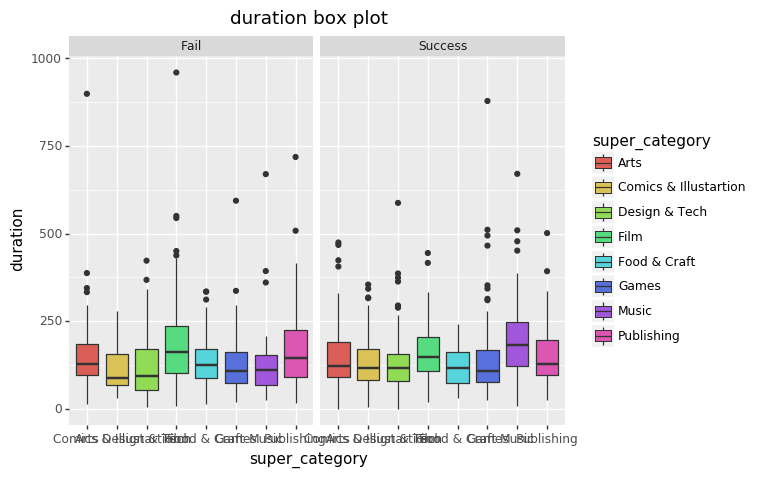

<ggplot: (-9223372029325114410)>

In [7]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~Success')
cat_duration.save('Category video duration by success.pdf')
cat_duration

## 최종 비디오
- 60초 이상 280초 미만

In [8]:
print(df[(df['duration'] > 60) & (df['duration'] < 280)].shape)
Final_video = df[(df['duration'] > 60) & (df['duration'] < 280)]

(1002, 6)


In [9]:
Final_video.groupby(['Success'])['Success'].count()

Success
Fail       459
Success    543
Name: Success, dtype: int64

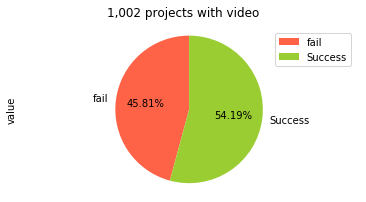

           group  value
fail        fail    459
Success  Success    543
Sum : 1002


In [10]:
group = ['fail','Success']
value = Final_video.groupby(['Success'])['Success'].count().values
pie_df = pd.DataFrame({'group':group,'value':value}, index=['fail','Success'])
total_value = pie_df['value'].sum()
fig = pie_df.plot(kind='pie',y='value',subplots=True, figsize=(6, 3),colors = ['tomato','yellowgreen'],\
                title= '1,002 projects with video', autopct='%.2f%%', startangle=90,shadow=False,\
                fontsize=10)[0]
fig_pie = fig.get_figure()
plt.axis('equal')
plt.show()

fig_pie.savefig('Final_video.pdf')
print(pie_df)
print('Sum : {0}'.format(pie_df['value'].sum()))

In [11]:
Final_video.groupby(['Success','super_category'])['duration'].describe()

count        mean        std        min  \
Success super_category                                                   
Fail    Arts                    33.0  135.484499  45.439715  63.797067   
        Comics & Illustartion   27.0  133.142353  65.910530  60.875000   
        Design & Tech           89.0  134.774602  55.938822  61.083333   
        Film                    70.0  163.067055  56.105781  63.104708   
        Food & Craft            69.0  148.300956  51.186530  77.619208   
        Games                   85.0  130.388688  51.339531  60.018292   
        Music                   25.0  122.186594  40.100225  60.890005   
        Publishing              61.0  165.112729  58.440331  67.434033   
Success Arts                    43.0  137.061799  48.364895  61.640000   
        Comics & Illustartion   71.0  131.931080  48.734301  61.000000   
        Design & Tech          110.0  129.835613  46.251555  61.561500   
        Film                    55.0  152.520597  52.559456  65.920000   
        Food & Craft            26.0  131.742860  52.150995  61.600000   
        Games                  122.0  126.015667  54.029205  60.950000   
        Music                   51.0  172.328338  59.928766  60.314348   
        Publishing              65.0  141.875764  55.593611  60.018292   

                                      25%         50%         75%         max  
Success super_category                                                         
Fail    Arts                   103.436667  127.133333  172.422250  230.666667  
        Comics & Illustartion   73.798725  123.500000  169.523950  279.012067  
        Design & Tech           86.766667  119.135683  175.440000  257.900000  
        Film                   115.250000  161.897067  209.791250  270.520250  
        Food & Craft           108.408300  138.104633  174.132292  277.644033  
        Games                   90.666667  120.520400  162.666667  276.541667  
        Music                   87.128708  133.233100  152.819333  206.900000  
        Publishing             112.378933  173.766667  222.622400  273.533333  
Success Arts                   103.203100  123.583333  160.585425  255.797208  
        Comics & Illustartion   91.450133  121.354567  166.268500  268.142875  
        Design & Tech           93.681087  124.090633  157.465642  267.058458  
        Film                   112.796017  145.728917  192.391167  260.041667  
        Food & Craft            99.887990  119.777992  169.613365  240.240000  
        Games                   80.713967  113.036500  164.539100  277.277000  
        Music                  123.301298  174.333333  225.312588  274.720000  
        Publishing             101.250000  127.193733  179.312467  270.266667

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Final Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

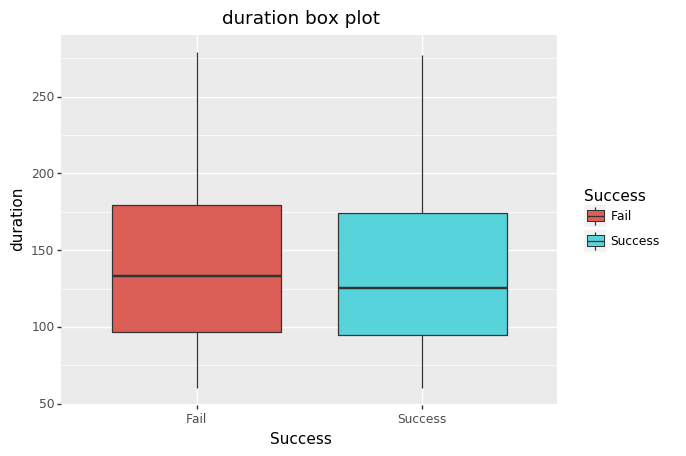

<ggplot: (7530234737)>

In [12]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(Final_video, aes(x='Success', y='duration')) \
    + geom_boxplot(aes(fill='Success')) \
    + ggtitle('duration box plot')
video_duration.save('Final Video duration by success.pdf')
video_duration

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Final Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

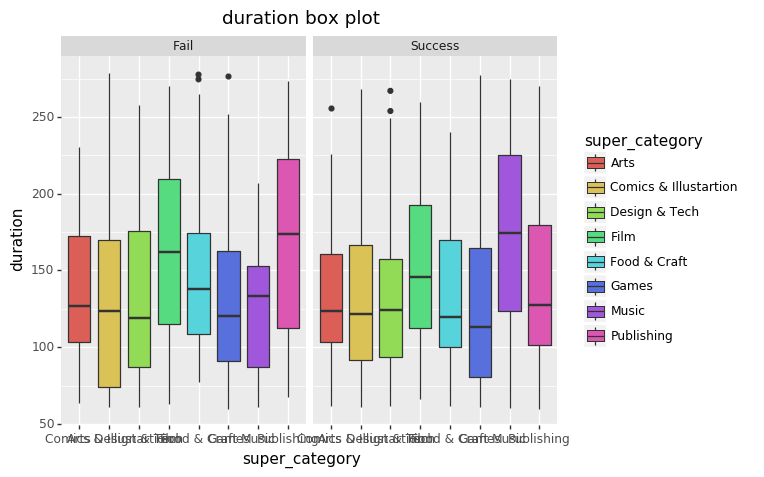

<ggplot: (-9223372029324537421)>

In [13]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(Final_video, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~Success')
cat_duration.save('Final Category video duration by success.pdf')
cat_duration

## 최종 Data 저장

In [14]:
Final_video.to_csv('Final_Data.csv',index=False,encoding='utf-16')